In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("book_variaveis.csv")

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

census_code       ID       CD_GEOCODI    TIPO   CD_GEOCODS  NM_SUBDIST  \
0  354100005000009  98237.0  354100005000009  URBANO  35410000500         NaN   
1  354100005000004  98232.0  354100005000004  URBANO  35410000500         NaN   
2  354100005000002  98230.0  354100005000002  URBANO  35410000500         NaN   
3  354100005000001  98229.0  354100005000001  URBANO  35410000500         NaN   
4  354100005000003  98231.0  354100005000003  URBANO  35410000500         NaN   

   CD_GEOCODD    NM_DISTRIT  CD_GEOCODM    NM_MUNICIP  ... min_norm max_norm  \
0   354100005  PRAIA GRANDE     3541000  PRAIA GRANDE  ...      NaN      NaN   
1   354100005  PRAIA GRANDE     3541000  PRAIA GRANDE  ...      NaN      NaN   
2   354100005  PRAIA GRANDE     3541000  PRAIA GRANDE  ...      NaN      NaN   
3   354100005  PRAIA GRANDE     3541000  PRAIA GRANDE  ...      NaN      NaN   
4   354100005  PRAIA GRANDE     3541000  PRAIA GRANDE  ...      NaN      NaN   

   sum_stand mean_stand  min_stand  max_stand  qtd_delegacias  min_distance  \
0        NaN        NaN        NaN        NaN             0.0      0.332868   
1        NaN        NaN        NaN        NaN             0.0      0.325228   
2        NaN        NaN        NaN        NaN             0.0      0.329569   
3        NaN        NaN        NaN        NaN             0.0      0.328277   
4        NaN        NaN        NaN        NaN             0.0      0.326206   

   cxa  il_class  
0  NaN       NaN  
1  NaN       NaN  
2  NaN       NaN  
3  NaN       NaN  
4  NaN       NaN  

[5 rows x 54 columns]

In [4]:
df.columns

Index(['census_code', 'ID', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODS', 'NM_SUBDIST',
       'CD_GEOCODD', 'NM_DISTRIT', 'CD_GEOCODM', 'NM_MUNICIP', 'NM_MICRO',
       'NM_MESO', 'CD_GEOCODB', 'NM_BAIRRO', 'ID1', 'area', 'rubrica_ ',
       'rubrica_Drogas sem autorização ou em desacordo ', 'rubrica_Furto ',
       'rubrica_Furto de coisa comum ', 'rubrica_Furto qualificado ',
       'rubrica_Homicídio culposo ',
       'rubrica_Homicídio culposo na direção de veículo automotor ',
       'rubrica_Homicídio qualificado ', 'rubrica_Homicídio simples ',
       'rubrica_Induzir, instigar ou auxiliar alguém ao uso indevido de droga',
       'rubrica_Lesão corporal ', 'rubrica_Lesão corporal culposa ',
       'rubrica_Lesão corporal culposa na direção de veículo automotor ',
       'rubrica_Lesão corporal de natureza GRAVE ',
       'rubrica_Lesão corporal seguida de morte ',
       'rubrica_Oferecer droga a pessoa de seu relacionamento ',
       'rubrica_Porte de entorpecente ', 'rubrica_Roubo ',
 

In [5]:
df.area

0         0.028694
1         0.122021
2         0.036933
3         0.101626
4         0.058967
           ...    
68291     0.709947
68292     2.881474
68293     1.132823
68294     0.209502
68295    77.691336
Name: area, Length: 68296, dtype: float64

In [6]:
df.sum_crimes_comuns

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
68291   NaN
68292   NaN
68293   NaN
68294   NaN
68295   NaN
Name: sum_crimes_comuns, Length: 68296, dtype: float64

In [7]:
df.census_code

0        354100005000009
1        354100005000004
2        354100005000002
3        354100005000001
4        354100005000003
              ...       
68291    355730305000008
68292    355730305000009
68293    355730305000010
68294    355730305000011
68295    355730305000012
Name: census_code, Length: 68296, dtype: int64

In [125]:
df_vars = pd.DataFrame({"census_code": df.census_code, "crimes":df.sum_crimes_comuns,"area":df.area, "qtd_delegacias":df.qtd_delegacias, "min_distance":df.min_distance*100000})

In [126]:
df_vars = df_vars.dropna()

In [127]:
df_vars.sort_values("qtd_delegacias", ascending=False).head(20)

census_code  crimes      area  qtd_delegacias  min_distance
59049  355030878000005  2010.0  0.146333            24.0           0.0
44261  355030809000012  1430.0  0.296108             9.0           0.0
44272  355030809000023   147.0  0.316477             6.0           0.0
44270  355030809000021   159.0  0.128321             6.0           0.0
53614  355030849000106    83.0  0.069290             6.0           0.0
55363  355030860000217    16.0  0.047940             5.0           0.0
59760  355030882000126    46.0  1.574744             5.0           0.0
56395  355030866000072   253.0  0.050404             5.0           0.0
56506  355030867000042    28.0  0.079987             5.0           0.0
55661  355030862000152     4.0  0.011032             4.0           0.0
45207  355030815000060    40.0  0.107301             4.0           0.0
59094  355030879000004    62.0  0.171459             4.0           0.0
60845  355030889000118    52.0  0.335340             4.0           0.0
44209  355030808000039    42.0  0.129133             4.0           0.0
58954  355030877000134    12.0  0.074020             4.0           0.0
50655  355030837000004   217.0  0.147583             3.0           0.0
54603  355030856000004    53.0  0.086167             3.0           0.0
44742  355030812000025   199.0  1.330713             3.0           0.0
44178  355030808000008    90.0  1.198072             3.0           0.0
46573  355030820000099    12.0  0.079149             3.0           0.0

In [128]:
df_vars["ccri"] = df_vars.apply(lambda x: np.log(x["crimes"]/x["area"]), axis=1)

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [129]:
#df_vars["ccridel"] = df_vars.apply(lambda x: np.log(x["crimes"]/x["area"]) - x["qtd_delegacias"] * 2, axis=1)

In [130]:
df_vars["ccridis"] = df_vars.apply(lambda x: np.log((x["crimes"]/x["area"]) * ((x["min_distance"]))), axis=1) 

/Users/caio.hc.oliveira/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


# $$ \log{\frac{crimes}{km^2} (10 dist^2)} $$

In [131]:
def fillinf(value):
    if(np.isinf(value)):
        return 0
    if(np.isnan(value)):
        return 0
    return value

In [132]:
df_vars["ccri"] = df_vars["ccri"].apply(lambda x: fillinf(x))

In [133]:
#df_vars["ccridel"] = df_vars["ccridel"].apply(lambda x:fillinf(x))

In [134]:
df_vars["ccridis"] = df_vars["ccridis"].apply(lambda x:fillinf(x))

In [135]:
df_vars.sample(frac=1).head()

census_code  crimes      area  qtd_delegacias  min_distance  \
64802  355250205000026   251.0  0.401774             0.0   8634.846860   
46066  355030818000190    10.0  0.027383             0.0    932.478785   
16584  351880005000677    25.0  0.086173             0.0   6308.324278   
52846  355030860000072    21.0  0.053108             0.0    372.340566   
64887  355250205000126     3.0  0.072073             0.0   9595.116275   

           ccri    ccridis  
64802  6.437319  15.500880  
46066  5.900428  12.738274  
16584  5.670277  14.419902  
52846  5.979953  11.899762  
64887  3.728687  12.897696

In [136]:
df_vars.sort_values("ccridis", ascending=False).head(10)

census_code  crimes      area  qtd_delegacias  min_distance  \
52649  355030845000185   384.0  0.003136             0.0    656.193701   
40515  354870805001142     5.0  0.000976             0.0   7766.878856   
38235  354780905000916    43.0  0.009726             0.0   7220.054183   
38213  354780905000894    77.0  0.020321             0.0   8303.862320   
40383  354870805001010     9.0  0.003115             0.0  10040.243951   
40329  354870805000956   734.0  0.198574             0.0   7075.002379   
26986  353060705000001    96.0  0.078531             0.0  19818.414584   
39756  354870805000372    74.0  0.028091             0.0   9105.025371   
38186  354780905000867   365.0  0.070491             0.0   4403.717164   
40432  354870805001059     5.0  0.002411             0.0  10909.128229   

            ccri    ccridis  
52649  11.715412  18.201869  
40515   8.541301  17.498925  
38235   8.394119  17.278736  
38213   8.239928  17.264404  
40383   7.968847  17.183204  
40329   8.215103  17.079426  
26986   7.108612  17.002979  
39756   7.876386  16.992967  
38186   8.552174  16.942378  
40432   7.637113  16.934468

In [137]:
df_vars["zccri"] = stats.zscore(df_vars.ccri)

In [138]:
df_vars["zccridis"] = stats.zscore(df_vars["ccridis"])

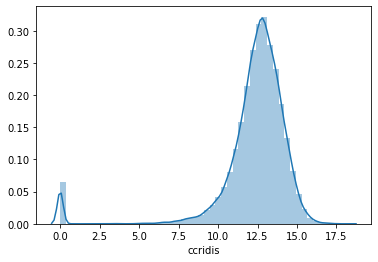

In [139]:
sns.distplot(df_vars.ccridis)

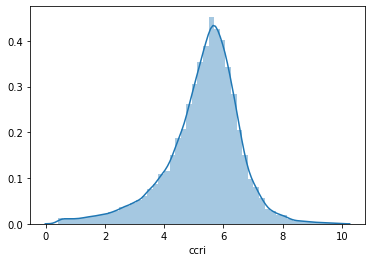

In [140]:
sns.distplot(df_vars.query("zccri > -3 & zccri < 3").ccri)

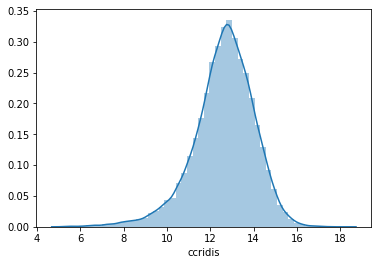

In [141]:
sns.distplot(df_vars.query("zccridis > -3 & zccridis < 3").ccridis)

In [142]:
df_vars_filtered = df_vars

In [143]:
df_vars_filtered.sort_values("area", ascending=False)

census_code  crimes       area  qtd_delegacias  min_distance  \
32501  353910305000004     3.0  84.738002             0.0  16781.227732   
5660   350660705000032     2.0  83.290662             0.0  31900.553448   
40591  354870810000043    38.0  76.949923             0.0  11543.062525   
63158  355100905000391     0.0  69.910374             0.0  13573.827951   
30901  353720605000013     1.0  69.640385             0.0  36018.903089   
...                ...     ...        ...             ...           ...   
56318  355030865000217     2.0   0.000959             0.0   3030.444088   
55331  355030860000185     1.0   0.000869             0.0    519.769161   
47042  355030822000334     1.0   0.000794             0.0    767.651200   
55323  355030860000177     1.0   0.000705             0.0    738.979870   
47968  355030826000146     6.0   0.000639             0.0    239.893228   

           ccri    ccridis     zccri  zccridis  
32501 -3.340952   6.387064 -5.368939 -2.486322  
5660  -3.729189   6.641189 -5.614576 -2.379673  
40591 -0.705569   8.648271 -3.701540 -1.537358  
63158  0.000000   0.000000 -3.255129 -5.166790  
30901 -4.243345   6.248455 -5.939880 -2.544492  
...         ...        ...       ...       ...  
56318  7.642560  15.659024  1.580295  1.404854  
55331  7.048577  13.301961  1.204484  0.415663  
47042  7.138307  13.781642  1.261256  0.616971  
55323  7.257468  13.862738  1.336648  0.651005  
47968  9.147759  14.627953  2.532630  0.972143  

[26659 rows x 9 columns]

In [144]:
df_vars_filtered.to_csv("ccri.csv", index=False)

In [145]:
df_vars_filtered.to_excel("ccri.xlsx", index=False)

In [146]:
0.5**2

0.25

In [148]:
df_vars_filtered.sort_values("ccridis", ascending=False)

census_code  crimes      area  qtd_delegacias  min_distance  \
52649  355030845000185   384.0  0.003136             0.0    656.193701   
40515  354870805001142     5.0  0.000976             0.0   7766.878856   
38235  354780905000916    43.0  0.009726             0.0   7220.054183   
38213  354780905000894    77.0  0.020321             0.0   8303.862320   
40383  354870805001010     9.0  0.003115             0.0  10040.243951   
...                ...     ...       ...             ...           ...   
25377  352850205000075     0.0  1.337515             0.0   4944.727756   
50979  355030838000043     0.0  0.019583             0.0   1242.297446   
61214  355030891000077    60.0  0.098753             3.0      0.000000   
51046  355030838000125     0.0  0.008621             0.0   1257.511422   
61501  355030892000217     0.0  0.005757             0.0   1637.479401   

            ccri    ccridis     zccri  zccridis  
52649  11.715412  18.201869  4.157176  2.472013  
40515   8.541301  17.498925  2.148926  2.177008  
38235   8.394119  17.278736  2.055804  2.084601  
38213   8.239928  17.264404  1.958248  2.078586  
40383   7.968847  17.183204  1.786736  2.044509  
...          ...        ...       ...       ...  
25377   0.000000   0.000000 -3.255129 -5.166790  
50979   0.000000   0.000000 -3.255129 -5.166790  
61214   6.409479   0.000000  0.800128 -5.166790  
51046   0.000000   0.000000 -3.255129 -5.166790  
61501   0.000000   0.000000 -3.255129 -5.166790  

[26659 rows x 9 columns]

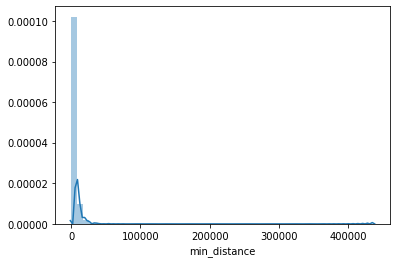

In [149]:
sns.distplot(df_vars_filtered.min_distance)